<a href="https://colab.research.google.com/github/sonamaryanish/Module3/blob/main/Assignment_datapreprocessing_module4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration: (Score : 2)
● Explore the data, list down the unique values in each feature and find its length.
● Perform the statistical analysis and renaming of the columns.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (update filename if needed)
df = pd.read_csv("Employee.csv")   # or pd.read_excel("data.xlsx")

# Quick look
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [81]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


(148, 6)

In [82]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())
    print("Count:", df[col].nunique())


Column: Company
['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Count: 6

Column: Age
[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Count: 29

Column: Salary
[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Count: 40

Column: Place
['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Count: 11

Column: Country
['India']
Count: 1

Column: Gender
[0 1]
Count: 2


Data Cleaning: (Score : 2)
● Find the missing and inappropriate values, treat them appropriately.
● Remove all duplicate rows.
● Find the outliers.
● Replace the value 0 in age as NaN Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode) .

In [83]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [84]:
df.describe(include='all')

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [85]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^\w_]", "", regex=True)
)

df.head()

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [86]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   company  140 non-null    object 
 1   age      130 non-null    float64
 2   salary   124 non-null    float64
 3   place    134 non-null    object 
 4   country  148 non-null    object 
 5   gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


Identify missing & inappropriate values

In [87]:
df.isnull().sum()
df['age']

,age
0,20.0
1,30.0
2,35.0
3,40.0
4,23.0
...,...
143,33.0
144,22.0
145,44.0
146,33.0


In [88]:
df['age'] = df['age'].replace(0,np.nan)

In [89]:
df.duplicated().sum()


np.int64(4)

In [90]:

df= df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   company  136 non-null    object 
 1   age      121 non-null    float64
 2   salary   121 non-null    float64
 3   place    130 non-null    object 
 4   country  144 non-null    object 
 5   gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'gender'}>, <Axes: >]], dtype=object)

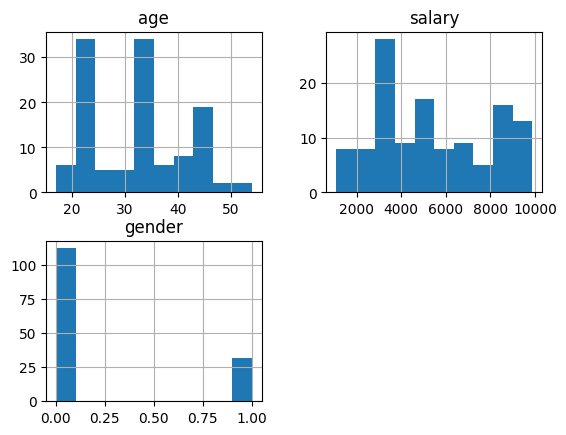

In [91]:
df.shape
df.hist()

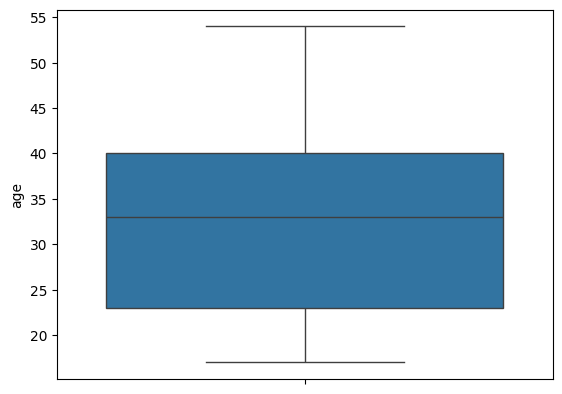

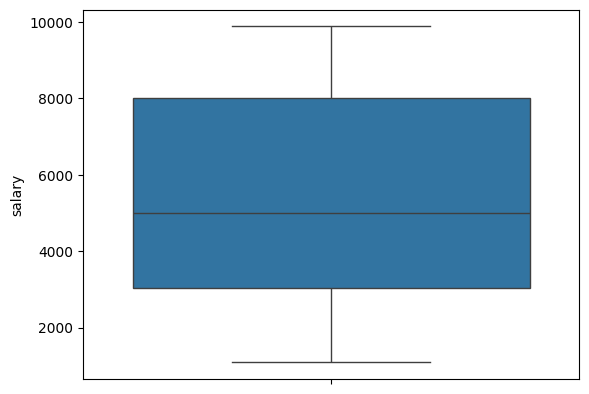

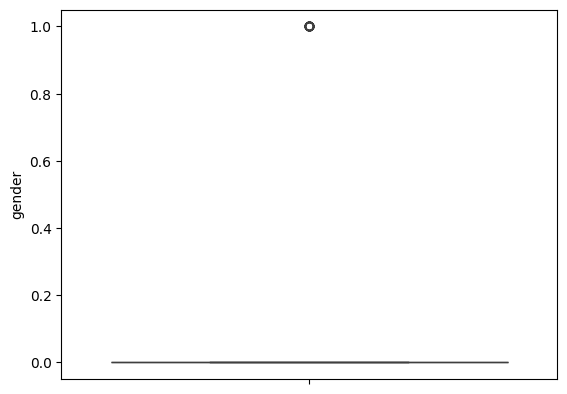

In [92]:
sns.boxplot(df['age'])
plt.show()
sns.boxplot(df['salary'])
plt.show()
sns.boxplot(df['gender'])
plt.show()

In [93]:
# Find outliers (IQR method)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols




Index(['age', 'salary', 'gender'], dtype='object')

In [94]:
outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Example: number of outliers per column
{col: len(outliers[col]) for col in outliers}

{'age': 0, 'salary': 0, 'gender': 32}

In [95]:
'''Treat missing (null) values
Numerical columns → Mean or Median'''

for col in numeric_cols:
  df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-4196335291.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [109]:
#Categorical columns → Mode

categorical_cols = df.select_dtypes(include=['object']).columns


for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-2297439679.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [97]:
#Final check after cleaning
# Confirm no missing values
df.isnull().sum()



,0
company,0
age,0
salary,0
place,0
country,0
gender,0


In [98]:
# Final dataset shape
df.shape



(144, 6)

In [99]:
# Preview cleaned data
df.head()

,company,age,salary,place,country,gender
0,TCS,20.0,5283.471074,Chennai,India,0
1,Infosys,30.0,5283.471074,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0


In [100]:
#Filter the data (age > 40 and salary < 5000)

filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]

filtered_df.head()



,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0


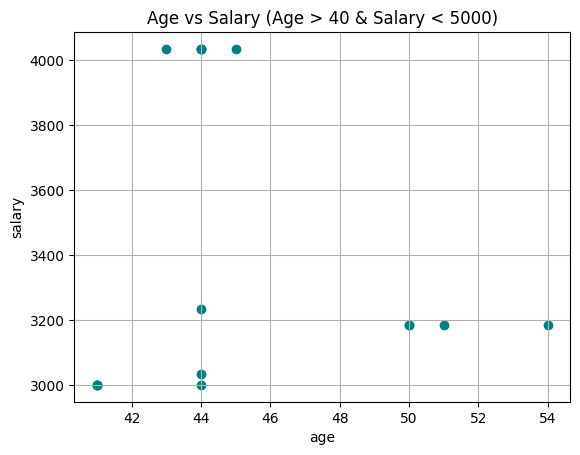

In [101]:
'''Filter the data with age >40 and salary<5000 Plot the chart with age and salary'''

plt.scatter(filtered_df['age'], filtered_df['salary'], color='Teal')
plt.xlabel('age')
plt.ylabel('salary')
plt.title('Age vs Salary (Age > 40 & Salary < 5000)')
plt.grid(True)
plt.show()

In [102]:
#Count the number of people from each place
place_counts = df['place'].value_counts()
place_counts

,count
place,
Mumbai,48
Calcutta,32
Chennai,14
Delhi,14
Cochin,13
Noida,8
Hyderabad,8
Podicherry,3
Pune,2


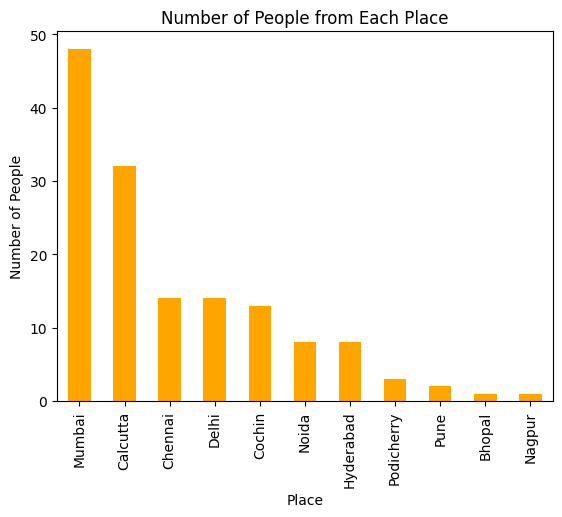

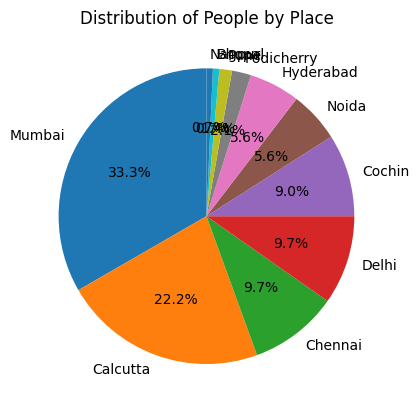

In [103]:
#Visual representation of people from each place
#Bar Chart

place_counts.plot(kind='bar', color='orange')
plt.xlabel('Place')
plt.ylabel('Number of People')
plt.title('Number of People from Each Place')
plt.show()


place_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Distribution of People by Place')
plt.show()

In [104]:
'''Data Encoding: (Score : 2)
● Convert categorical variables into numerical representations using techniques such as one-hot encoding,
 label encoding, making them suitable for analysis by machine learning algorithms'''



'Data Encoding: (Score : 2)\n● Convert categorical variables into numerical representations using techniques such as one-hot encoding,\n label encoding, making them suitable for analysis by machine learning algorithms'

In [116]:
#Identify categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols
#df.select_dtypes(include=['int','float']).columns


Index(['company', 'place', 'country'], dtype='object')

In [121]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_label_encoded = df.copy()

for col in categorical_cols:
    df[col] = le.fit_transform(df_label_encoded[col])

df.head()

,company,age,salary,place,country,gender
0,4,20.0,5283.471074,2,0,0
1,2,30.0,5283.471074,6,0,0
2,4,35.0,2300.000000,1,0,0
3,2,40.0,3000.000000,4,0,0
4,4,23.0,4000.000000,6,0,0


In [122]:
'''One-Hot Encoding'''

#Using pandas

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.head()

,age,salary,gender,company_1,company_2,company_3,company_4,company_5,place_1,place_2,place_3,place_4,place_5,place_6,place_7,place_8,place_9,place_10
0,20.0,5283.471074,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,30.0,5283.471074,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.000000,0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.000000,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.000000,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [123]:
'''After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.'''

X=df.drop(['salary'],axis=1)
Y=df['salary']
df.info()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        144 non-null    float64
 1   salary     144 non-null    float64
 2   gender     144 non-null    int64  
 3   company_1  144 non-null    bool   
 4   company_2  144 non-null    bool   
 5   company_3  144 non-null    bool   
 6   company_4  144 non-null    bool   
 7   company_5  144 non-null    bool   
 8   place_1    144 non-null    bool   
 9   place_2    144 non-null    bool   
 10  place_3    144 non-null    bool   
 11  place_4    144 non-null    bool   
 12  place_5    144 non-null    bool   
 13  place_6    144 non-null    bool   
 14  place_7    144 non-null    bool   
 15  place_8    144 non-null    bool   
 16  place_9    144 non-null    bool   
 17  place_10   144 non-null    bool   
dtypes: bool(15), float64(2), int64(1)
memory usage: 6.6 KB
